define the reuqired libraries

In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

read the data from the csv file 

In [5]:
df_corpus = pd.read_csv('TwoCorporaTokensandTypesCSV.csv')

get the tokens and Corpus A Terms

In [6]:
T = df_corpus['Processed Tokens'].values
M = df_corpus['Corpus A Terms or types'].values

define the heap low function

In [12]:
n = 30
T_fit = T[::n]
M_fit = M[::n]

# Take the logarithm of the selected T and M
logT_fit = np.log2(T_fit)
logM_fit = np.log2(M_fit)

# Use np.polyfit to fit a line to the log-log data
alpha, logK = np.polyfit(logT_fit, logM_fit, 1)

# Calculate K from logK
K = 2**logK

Results

K = 7.314059691204574 alpha = 0.6780290851441715


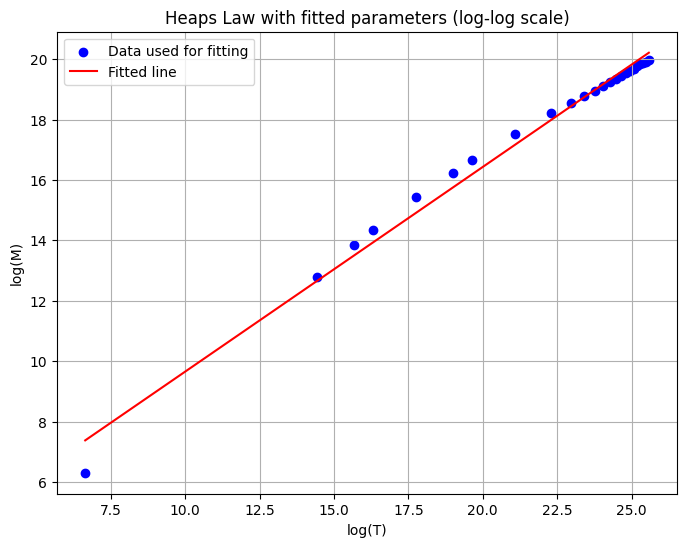

In [13]:
# Print the parameters K and alpha
print("K =", K, "alpha =", alpha)

# Plot the fitted line and the data points used for fitting
plt.figure(figsize=(8, 6))
plt.scatter(logT_fit, logM_fit, color='blue', label='Data used for fitting')
plt.plot(logT_fit, logK + alpha*logT_fit, color='red', linestyle='-', label='Fitted line')

# Plot the remaining data points (not used for fitting) for testing
logT_test = np.delete(np.log2(T), np.arange(0, len(T), n))
logM_test = np.delete(np.log2(M), np.arange(0, len(M), n))

plt.xlabel('log(T)')
plt.ylabel('log(M)')
plt.title('Heaps Law with fitted parameters (log-log scale)')
plt.grid(True)
plt.legend(loc='best')
plt.show()